# Algoritmo de Dijkstra - sem caminhos

Você recebe um inteiro `start` e uma lista `edges` de pares de inteiros.

A lista é chamada de lista de adjacência e representa um grafo. O número de vértices no grafo é igual ao comprimento de `edges`, onde cada índice `i` em `edges` contém as arestas de saída do vértice `i`, sem uma ordem específica. Cada aresta individual é representada por um par de dois números, `[destino, distância]`, onde o destino é um número inteiro positivo indicando o vértice de destino, e a distância é um número inteiro positivo representando o comprimento da aresta (a distância do vértice `i` até o vértice `destino`). Note que essas arestas são direcionadas, o que significa que você só pode viajar de um vértice específico para o seu destino — não no sentido contrário (a menos que o vértice de destino tenha uma aresta de saída para o vértice original).

Escreva uma função que calcule os comprimentos dos caminhos mais curtos entre `start` e todos os outros vértices no grafo usando o algoritmo de Dijkstra e os retorne em um array. Cada índice `i` no array de saída deve representar o comprimento do caminho mais curto entre `start` e o vértice `i`. Se nenhum caminho for encontrado de `start` para o vértice `i`, então `output[i]` deve ser `-1`.

Observe que o grafo representado por `edges` não conterá nenhum laço (vértices com uma aresta de saída para si mesmos) e terá apenas arestas com pesos positivos (ou seja, sem distâncias negativas).

Se você não estiver familiarizado com o algoritmo de Dijkstra, recomendamos assistir à seção de visão geral conceitual do vídeo explicativo desta questão antes de começar a programar.

**Sample Input**

In [20]:
start = 0
edges = [
    [[1, 7]],
    [[2, 6], [3, 20], [4, 3]],
    [[3, 14]],
    [[4, 2]],
    [],
    [],
]

**Sample Output**

In [21]:
[0, 7, 13, 27, 10, -1]
# edges

[0, 7, 13, 27, 10, -1]

## Dicas

**Dica 1**

O algoritmo de Dijkstra funciona visitando vértices no grafo, um por vez, enquanto mantém o controle das menores distâncias atuais do vértice inicial para todos os outros vértices e atualiza continuamente essas menores distâncias. Mais especificamente, o algoritmo mantém o controle dos vértices não visitados e visita o vértice não visitado com a menor distância em qualquer momento, começando naturalmente com o vértice inicial. Sempre que o algoritmo visita um vértice não visitado, ele analisa todas as suas arestas de saída e tenta atualizar as menores distâncias do vértice inicial para os destinos dessas arestas, usando a menor distância atual até o vértice sendo visitado como base. Quando o algoritmo tiver visitado todos os vértices e considerado todas as suas arestas, ele terá encontrado, com garantia, o caminho mais curto para cada vértice. Como você pode implementar esse algoritmo?

**Dica 2**

A parte mais desafiadora do algoritmo de Dijkstra é determinar como encontrar de forma eficiente o vértice com a menor distância atual. Você consegue pensar em uma estrutura de dados que poderia ser usada para manter controle das distâncias e para recuperar de forma eficiente o vértice com a menor distância atual em cada etapa?

**Dica 3**

Crie um array que possa armazenar as menores distâncias finais entre o vértice inicial e todos os outros vértices, assim como uma min-heap que armazenará todos os vértices não visitados e suas menores distâncias atuais. Tanto para o array de distâncias finais quanto para a min-heap, inicialize todos os vértices, exceto o nó inicial, com uma distância de infinito; o nó inicial terá distância 0. Em seguida, escreva um laço `while` que será executado enquanto a min-heap não estiver vazia. Em cada iteração do laço, remova o vértice do topo da heap (o vértice com a menor distância), percorra todas as suas arestas e, para cada aresta, atualize a menor distância do vértice de destino para ser o mínimo entre a menor distância atual do destino e a distância do vértice visitado mais o peso da aresta atual. Quando a heap estiver vazia, todos os vértices terão sido visitados, e você terá as menores distâncias para todos os vértices armazenadas no seu array de distâncias.

In [29]:
class MinHeap:
    """
    MinHeap class: Implements a MinHeap data structure to efficiently manage vertices and their distances
    for algorithms like Dijkstra. This implementation keeps track of the position of each vertex using
    a vertex map for constant-time lookups and updates.
    
    Classe MinHeap: Implementa uma estrutura de dados MinHeap para gerenciar eficientemente vértices e suas
    distâncias para algoritmos como Dijkstra. Esta implementação mantém o controle da posição de cada vértice
    usando um mapa de vértices para pesquisas e atualizações de tempo constante.
    """
    def __init__(self, array):
        """
        Initializes the MinHeap with an input array of (vertex, distance) pairs.
        Inicializa o MinHeap com uma matriz de entrada de pares (vértice, distância).

        Args:
            array (list): List of tuples where each tuple is (vertex, distance).
                          The distance is typically initialized to infinity except for the starting vertex.

        Args:
            array (lista): Lista de tuplas onde cada tupla é (vértice, distância).
                          A distância é tipicamente inicializada para infinito, exceto para o vértice inicial.

        Attributes:
            vertexMap (dict): Maps each vertex to its position in the heap for quick access.
            heap (list): List representing the binary heap as an array.            

        Atributos:
            vertexMap (dict): Mapeia cada vértice para sua posição no heap para acesso rápido.
            heap (lista): Lista representando o heap binário como um array.
        """
        
        # Cria um mapa de vértice: Mapeia vértices para seus índices no heap.
        self.vertexMap = {idx: idx for idx in range(len(array))}

        # Constrói o heap a partir da array de entrada para satisfazer a propriedade heap.
        self.heap = self.buildHeap(array)

    def isEmpty(self):
        """
        Verifica se o heap está vazio.

        Retorna:
            bool: True se o heap estiver vazio, False caso contrário.
        """
        return len(self.heap) == 0

    def buildHeap(self, array):
        """
        Constrói o heap a partir de um array de entrada em tempo O(n).

        Argumentos:
            array (lista): Lista de pares (vértice, distância).

        Retorna:
            lista: O array de entrada transformado em um MinHeap válido.
        """
        # Start from the first parent node and sift down each node.
        firstParentIdx = (len(array) - 2) // 2
        for currentIdx in reversed(range(firstParentIdx + 1)):
            self.siftDown(currentIdx, len(array) - 1, array)
        return array

    def siftDown(self, currentIdx, endIdx, heap):
        """
        Restaura a propriedade heap "peneirando" um nó para sua posição correta.

        Argumentos:
            currentIdx (int): Índice do nó para peneirar.
            endIdx (int): Último índice no heap.
            heap (lista): O array do heap.

        Complexidade:
            Tempo: O(log(n))
            Espaço: O(1)
        """
        
        # Índice do primeiro filho
        childOneIdx = currentIdx * 2 + 1
        
        while childOneIdx <= endIdx:
            # Determina o índice do segundo filho
            childTwoIdx = currentIdx * 2 + 2 if currentIdx * 2 + 2 <= endIdx else -1

            # Escolhe o menor filho para manter da propriedade min-heap
            if childTwoIdx != -1 and heap[childTwoIdx][1] < heap[childOneIdx][1]:
                idxToSwap = childTwoIdx
            else:
                idxToSwap = childOneIdx

            # Trocar se o filho for menor que o nó atual
            if heap[idxToSwap][1] < heap[currentIdx][1]:
                self.swap(currentIdx, idxToSwap, heap)
                currentIdx = idxToSwap            # Mover para a posição trocada
                childOneIdx = currentIdx * 2 + 1  # Atualizar o índice do primeiro filho
            else:
                return

    def siftUp(self, currentIdx, heap):
        """
        Restores the heap property by "sifting up" a node into its correct position.

        Args:
            currentIdx (int): Index of the node to sift up.
            heap (list): The heap array.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        parentIdx = (currentIdx - 1) // 2  # Calculate parent index
        while currentIdx > 0 and heap[currentIdx][1] < heap[parentIdx][1]:
            self.swap(currentIdx, parentIdx, heap)  # Swap with parent
            currentIdx = parentIdx  # Move to the parent's position
            parentIdx = (currentIdx - 1) // 2

    def remove(self):
        """
        Removes and returns the smallest element (root) in the heap.

        Returns:
            tuple: The (vertex, distance) pair with the smallest distance.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        if self.isEmpty():
            return None

        # Swap the root with the last element and remove it
        self.swap(0, len(self.heap) - 1, self.heap)
        vertex, distance = self.heap.pop()
        self.vertexMap.pop(vertex)  # Remove the vertex from the map

        # Restore the heap property
        self.siftDown(0, len(self.heap) - 1, self.heap)
        return vertex, distance

    def swap(self, i, j, heap):
        """
        Swaps two nodes in the heap and updates their positions in the vertexMap.

        Args:
            i (int): Index of the first node.
            j (int): Index of the second node.
            heap (list): The heap array.
        """
        self.vertexMap[heap[i][0]] = j  # Update vertexMap for heap[i]
        self.vertexMap[heap[j][0]] = i  # Update vertexMap for heap[j]
        heap[i], heap[j] = heap[j], heap[i]  # Swap the nodes in the heap

    def update(self, vertex, value):
        """
        Updates the distance of a given vertex and restores the heap property.

        Args:
            vertex (int): The vertex whose distance is to be updated.
            value (int): The new distance value.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        # Update the heap with the new (vertex, value) pair
        self.heap[self.vertexMap[vertex]] = (vertex, value)
        # Restore the heap property by sifting up the updated node
        self.siftUp(self.vertexMap[vertex], self.heap)

In [30]:
# O((v + e) * log(v)) tempo | O(v) espaço — onde v é o número
# de vértices e e é o número de arestas no grafo de entrada
def dijkstrasAlgorithm(start, edges):
    """
    Implementa o algoritmo de Dijkstra para encontrar os caminhos mais curtos
    a partir de um vértice inicial para todos os outros vértices em um grafo
    ponderado. O grafo é representado usando uma lista de adjacência.

    Args:
        start (int): O índice do vértice inicial.
        edges (list of list): Uma lista de adjacência onde cada índice representa 
                              um vértice, e cada entrada é uma lista de pares 
                              [destino, peso].

    Returns:
        list: Uma lista de distâncias mínimas do vértice inicial para cada vértice
              no grafo. Se um vértice for inalcançável, sua distância será 
              representada como -1.
    """
    # Passo 1: Inicializa o número de vértices no grafo
    numberOfVertices = len(edges)

    # Passo 2: Inicializa as distâncias mínimas com infinito
    # Define a distância do vértice inicial como 0
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0

    # Passo 3: Inicializa o MinHeap para rastrear os vértices e suas distâncias
    # mais curtas atuais
    minDistancesHeap = MinHeap([(idx, float("inf")) for idx in range(numberOfVertices)])
    minDistancesHeap.update(start, 0)  # Atualiza a distância do vértice inicial para 0

    # Passo 4: Processa os vértices até que o heap esteja vazio
    while not minDistancesHeap.isEmpty():
        # Extrai o vértice com a menor distância conhecida
        vertex, currentMinDistance = minDistancesHeap.remove()

        # Se a distância atual for infinito, não há mais vértices alcançáveis
        if currentMinDistance == float("inf"):
            break

        # Passo 5: Relaxamento - Atualiza as distâncias de todos os vértices vizinhos
        for edge in edges[vertex]:
            destination, distanceToDestination = edge  # Extrai o vizinho e o peso

            # Calcula a nova distância potencial pelo caminho
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]

            # Se o novo caminho for mais curto, atualiza a distância e o heap
            if newPathDistance < currentDestinationDistance:
                minDistances[destination] = newPathDistance
                minDistancesHeap.update(destination, newPathDistance)

    # Passo 6: Converte as distâncias dos vértices inalcançáveis de infinito para -1
    return list(map(lambda x: -1 if x == float("inf") else x, minDistances))


In [24]:
def test_dijkstras_algorithm():
    """
    Test function for Dijkstra's algorithm.

    This test evaluates the correctness of the `dijkstrasAlgorithm` function using a predefined input graph
    and expected output. The graph is represented as an adjacency list, and the test ensures that the
    algorithm computes the shortest paths correctly.

    Input Graph:
        Node 0 -> Node 1 (weight 7)
        Node 1 -> Node 2 (weight 6), Node 3 (weight 20), Node 4 (weight 3)
        Node 2 -> Node 3 (weight 14)
        Node 3 -> Node 4 (weight 2)
        Node 4 -> No outgoing edges
        Node 5 -> No outgoing edges

    Expected Output:
        [0, 7, 13, 27, 10, -1]
        - Shortest distances from node 0 to all other nodes.
        - `-1` represents unreachable nodes (node 5 in this case).

    Assertions:
        The test checks if the result matches the expected output and raises an assertion error otherwise.

    Returns:
        None. Prints "Test passed" if the output is correct.
    """
    # Input graph represented as an adjacency list
    edges = [
        [[1, 7]],                   # Node 0 -> Node 1 (weight 7)
        [[2, 6], [3, 20], [4, 3]],  # Node 1 -> Node 2 (6), Node 3 (20), Node 4 (3)
        [[3, 14]],                  # Node 2 -> Node 3 (weight 14)
        [[4, 2]],                   # Node 3 -> Node 4 (weight 2)
        [],                         # Node 4 has no outgoing edges
        []                          # Node 5 has no outgoing edges
    ]
    start = 0  # Starting node for Dijkstra's algorithm

    # Expected output: Shortest distances from the starting node
    expected_output = [0, 7, 13, 27, 10, -1]

    # Step 1: Run Dijkstra's algorithm on the input graph
    result = dijkstrasAlgorithm(start, edges)

    # Step 2: Compare the result with the expected output
    assert result == expected_output, f"Test failed: expected {expected_output}, but got {result}"

    # Step 3: If no assertion error, print test success message
    print("Test passed: Output matches expected result.")


# Run the test function
test_dijkstras_algorithm()

Test passed: Output matches expected result.


# Dijstrak's Algorithm with Path

In [6]:
def dijkstrasAlgorithmWithPaths(start, edges):
    """
    Implements Dijkstra's algorithm to compute the shortest paths from a starting vertex to all other vertices
    in a weighted graph. It also tracks the predecessors of each vertex for path reconstruction.

    Args:
        start (int): The index of the starting vertex.
        edges (list of list): Adjacency list representation of the graph, where each index represents a vertex,
                              and each entry is a list of [destination, weight] pairs.

    Returns:
        tuple: A tuple containing:
            - minDistances (list): A list of the shortest distances from the starting vertex to each vertex.
                                   Vertices that are unreachable will have a distance of `float("inf")`.
            - previousNodes (list): A list where each index points to the predecessor of the vertex
                                    in the shortest path. If no path exists, the predecessor is `None`.

    Algorithm Steps:
        1. Initialize distances with `infinity` and set the starting vertex distance to 0.
        2. Use a MinHeap to manage and efficiently retrieve the vertex with the smallest known distance.
        3. For each vertex, relax its edges to update distances to neighboring vertices.
        4. Track the predecessor of each vertex to allow path reconstruction later.
        5. Return the minimum distances and the list of predecessors.
    """
    numberOfVertices = len(edges)  # Total number of vertices in the graph

    # Step 1: Initialize minimum distances and predecessors
    minDistances = [float("inf")] * numberOfVertices  # All distances set to infinity initially
    minDistances[start] = 0  # Distance to the start node is 0

    previousNodes = [None] * numberOfVertices  # Array to store the predecessor of each vertex

    # Step 2: Initialize the MinHeap
    heap = MinHeap([(i, float("inf")) for i in range(numberOfVertices)])
    heap.update(start, 0)  # Update the distance of the starting vertex to 0

    # Step 3: Process vertices until the heap is empty
    while not heap.isEmpty():
        # Extract the vertex with the smallest known distance
        vertex, currentMinDistance = heap.remove()

        # Ignore outdated distances (e.g., if a shorter distance was already found)
        if currentMinDistance > minDistances[vertex]:
            continue

        # Step 4: Relaxation - Update distances to neighboring vertices
        for edge in edges[vertex]:
            destination, weight = edge  # Extract destination vertex and edge weight

            # Calculate the new potential distance to the destination vertex
            newPathDistance = currentMinDistance + weight

            # Update if the new path is shorter
            if newPathDistance <= minDistances[destination]:
                minDistances[destination] = newPathDistance
                previousNodes[destination] = vertex  # Track the predecessor for path reconstruction
                heap.update(destination, newPathDistance)  # Update the heap with the new distance

    return minDistances, previousNodes

In [7]:
def reconstructPath(previousNodes, start, end):
    """
    Reconstructs the shortest path from the start node to the end node using the predecessor list.

    Args:
        previousNodes (list): A list where each index corresponds to a node, and the value at that index
                              is the predecessor node in the shortest path. `None` indicates no predecessor.
        start (int): The starting node index.
        end (int): The destination node index.

    Returns:
        list: A list of nodes representing the shortest path from the start node to the end node.
              If no path exists, returns an empty list.

    Algorithm:
        1. Start from the destination node (`end`) and trace back to the start node (`start`) using
           the `previousNodes` list.
        2. Append each node encountered to the `path` list.
        3. Reverse the `path` list to produce the correct order from start to end.
        4. If no valid path exists (e.g., disconnected graph), return an empty list.

    Example:
        previousNodes = [None, 0, 1, 2]  # Predecessor list
        start = 0
        end = 3
        reconstructPath(previousNodes, start, end) -> [0, 1, 2, 3]
    """
    path = []  # Initialize an empty list to store the path
    currentNode = end  # Start tracing from the destination node

    # Step 1: Trace back from the destination node to the start node
    while currentNode is not None and currentNode != start:
        path.append(currentNode)  # Add the current node to the path
        currentNode = previousNodes[currentNode]  # Move to the predecessor node

    # Step 2: Add the start node if a valid path was found
    if currentNode == start:
        path.append(start)  # Add the start node to the path
        path.reverse()  # Reverse the path to get the correct order from start to end
        return path

    # Step 3: If no path exists, return an empty list
    return []

In [8]:
def test_dijkstrasAlgorithmWithPaths():
    """
    Test function for the `dijkstrasAlgorithmWithPaths` function.

    This test verifies:
        1. The correctness of the minimum distances calculated by Dijkstra's algorithm.
        2. The correctness of the reconstructed paths using the `reconstructPath` function.

    Input Graph (Adjacency List):
        - Node 0 -> Node 1 (weight 7)
        - Node 1 -> Node 2 (weight 6), Node 3 (weight 20), Node 4 (weight 3)
        - Node 2 -> Node 3 (weight 14)
        - Node 3 -> Node 4 (weight 2)
        - Node 4 has no outgoing edges
        - Node 5 is isolated (no incoming or outgoing edges).

    Expected Results:
        - Minimum Distances:
            [0, 7, 13, 27, 10, float("inf")]
            - Distances from node 0 to all other nodes. `float("inf")` represents unreachable nodes.
        - Reconstructed Paths:
            - Path to node 3: [0, 1, 2, 3]
            - Path to node 4: [0, 1, 4]
            - Path to node 5: []

    Assertions:
        The test uses assertions to ensure that the computed distances and paths match the expected values.

    Returns:
        None. Prints "All tests passed!" if the results are correct.
    """
    # Step 1: Define the input graph as an adjacency list
    edges = [
        [[1, 7]],                   # Node 0 -> Node 1 (weight 7)
        [[2, 6], [3, 20], [4, 3]],  # Node 1 -> Node 2 (6), Node 3 (20), Node 4 (3)
        [[3, 14]],                  # Node 2 -> Node 3 (weight 14)
        [[4, 2]],                   # Node 3 -> Node 4 (weight 2)
        [],                         # Node 4 has no outgoing edges
        []                          # Node 5 has no outgoing edges
    ]
    start = 0  # Starting node for Dijkstra's algorithm

    # Step 2: Run Dijkstra's algorithm
    minDistances, previousNodes = dijkstrasAlgorithmWithPaths(start, edges)

    # Step 3: Check the minimum distances
    expectedDistances = [0, 7, 13, 27, 10, float("inf")]
    assert minDistances == expectedDistances, f"Distances test failed: {minDistances}"

    # Step 4: Reconstruct paths to specific nodes and validate them
    # Path to node 3
    path_to_3 = reconstructPath(previousNodes, start, 3)
    expectedPathTo3 = [0, 1, 2, 3]
    assert path_to_3 == expectedPathTo3, f"Path to 3 test failed: {path_to_3}"

    # Path to node 4
    path_to_4 = reconstructPath(previousNodes, start, 4)
    expectedPathTo4 = [0, 1, 4]
    assert path_to_4 == expectedPathTo4, f"Path to 4 test failed: {path_to_4}"

    # Path to node 5 (unreachable)
    path_to_5 = reconstructPath(previousNodes, start, 5)
    expectedPathTo5 = []
    assert path_to_5 == expectedPathTo5, f"Path to 5 test failed: {path_to_5}"

    # Step 5: Print success message if all tests pass
    print("All tests passed!")


# Run the test
test_dijkstrasAlgorithmWithPaths()

All tests passed!


# Código

In [31]:
import random
import numpy as np
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
# 1. Obtenção do grafo de ruas de Natal-RN
place_name = "Natal, Rio Grande do Norte, Brazil"
G = ox.graph_from_place(place_name, network_type='all')

# 2. Escolher 10 pares de pontos de interesse (exemplo)
# Exemplo de coordenadas de pontos de interesse na cidade
points_of_interest = [
    ("UFRN", (5.8666, -35.3045)),  # Exemplo de coordenadas
    ("Praia de Ponta Negra", (5.9020, -35.1760)),
    ("Shopping Midway Mall", (5.8111, -35.2116)),
    ("Arena das Dunas", (5.8036, -35.2095)),
    ("Museu Câmara Cascudo", (5.7965, -35.2105)),
    ("Ilha de Fernando de Noronha", (3.8550, -32.4201)),  # Exemplo adicional
    ("Praça 7 de Setembro", (5.7948, -35.2101)),
    ("Hospital das Clínicas", (5.8580, -35.3070)),
    ("Centro de Convenções", (5.8363, -35.2071)),
    ("Ribeira", (5.6980, -35.3004))
]

# 3. Obtenção do grafo de rotas
# Converte para um grafo direcionado com distâncias em metros
G = ox.utils.get_largest_component(G)

# 4. Aplicação do algoritmo de Dijkstra (networkx e MinHeap)
for i in range(0, len(points_of_interest), 2):
    origin = points_of_interest[i]
    destination = points_of_interest[i + 1]
    
    origin_node = ox.distance.nearest_nodes(G, X=origin[1][1], Y=origin[1][0])
    destination_node = ox.distance.nearest_nodes(G, X=destination[1][1], Y=destination[1][0])
    
    # Dijkstra com NetworkX
    path_nx = nx.shortest_path(G, origin_node, destination_node, weight='length')
    
    # Visualização do caminho
    fig, ax = plt.subplots(figsize=(10, 10))
    ox.plot_graph_route(G, path_nx, route_linewidth=6, node_size=0, bgcolor='k', ax=ax)
    ax.set_title(f"Caminho mais curto entre {origin[0]} e {destination[0]} (NetworkX)")

    # Dijkstra com MinHeap (utilizando a implementação de Dijkstra com MinHeap que você forneceu)
    edges = [[] for _ in range(len(G.nodes))]
    for u, v, data in G.edges(data=True):
        weight = data.get('length', 1)
        edges[u].append([v, weight])
        edges[v].append([u, weight])  # Grafo não direcionado
    
    # Utilizando o seu MinHeap Dijkstra
    start = origin_node
    min_heap_result = dijkstrasAlgorithm(start, edges)
    
    # Visualização do caminho com MinHeap
    path_min_heap = []
    current_node = destination_node
    while current_node != start:
        path_min_heap.append(current_node)
        current_node = min_heap_result[current_node]
    path_min_heap.append(start)
    path_min_heap.reverse()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ox.plot_graph_route(G, path_min_heap, route_linewidth=6, node_size=0, bgcolor='k', ax=ax)
    ax.set_title(f"Caminho mais curto entre {origin[0]} e {destination[0]} (MinHeap)")

    plt.show()


AttributeError: module 'osmnx.utils' has no attribute 'get_largest_component'

In [ ]:
# # 1. Importar as bibliotecas
# import osmnx
# import networkx

# # 2. Definir coordenadas geográficas dos pontos
# ponto_inicial = (latitude_inicial, longitude_inicial)
# ponto_final = (latitude_final, longitude_final)

# # 3. Baixar o grafo da área
# place = "Universidade Federal do Rio Grande do Norte, Natal, Brazil"
# grafo = osmnx.graph_from_place(place, network_type="drive")

# # 4. Encontrar os nós mais próximo
# no_inicial = osmnx.nearest_nodes(grafo, longitude_inicial, latitude_inicial)
# no_final = osmnx.nearest_nodes(grafo, longitude_final, latitude_final)

# # 5. Calcular o caminho mais curto
# caminho = networkx.shortest_path(grafo,
#                                  source=no_inicial,
#                                  target=no_final, weight="length")

# # 6. Visualizar o caminho no mapa
# figura, eixo = osmnx.plot_graph_route(grafo, caminho)

Pares de interesse (origem, destino): [(243207469, 243207479), (243207479, 243207483), (243207483, 243207565), (243207565, 243207566), (243207566, 243207569), (243207569, 243207570), (243207570, 243207571), (243207571, 243207572), (243207572, 243207954), (243207954, 243207955)]
Caminhos mais curtos entre pares: {(243207469, 243207479): {243207479: 997.4440661136746}, (243207479, 243207483): {243207483: 753.6826232891158}, (243207483, 243207565): {243207565: 3740.4742095771876}, (243207565, 243207566): {243207566: 132.97218073121246}, (243207566, 243207569): {243207569: 215.76972232109256}, (243207569, 243207570): {243207570: 5.53192260750334}, (243207570, 243207571): {243207571: 110.0735975550361}, (243207571, 243207572): {243207572: 37.49918982072386}, (243207572, 243207954): {243207954: 2160.414177192761}, (243207954, 243207955): {243207955: 296.0212247952685}}


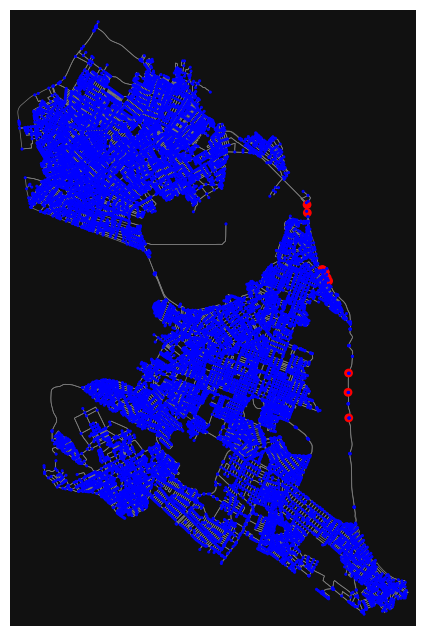

In [19]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Função de Dijkstra corrigida
def dijkstrasAlgorithm(start, adjacency_list):
    """
    Algoritmo de Dijkstra para calcular as distâncias mínimas de um nó inicial
    para todos os outros nós do grafo.

    Args:
        start (int): Nó inicial.
        adjacency_list (list): Lista de adjacência do grafo.

    Returns:
        dict: Dicionário com as distâncias mínimas dos nós a partir do nó inicial.
    """
    numberOfVertices = len(adjacency_list)
    minDistances = {start: 0}  # Dicionário para armazenar distâncias mínimas
    minDistancesHeap = [(0, start)]  # Inicializa a heap com o nó inicial e distância 0
    visited = set()  # Conjunto de nós já visitados

    while minDistancesHeap:
        current_distance, current_node = heapq.heappop(minDistancesHeap)
        
        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in adjacency_list[current_node]:
            if neighbor in visited:
                continue

            new_distance = current_distance + weight

            if neighbor not in minDistances or new_distance < minDistances[neighbor]:
                minDistances[neighbor] = new_distance
                heapq.heappush(minDistancesHeap, (new_distance, neighbor))

    # Retorna o dicionário com as distâncias mínimas
    return minDistances

# Função para calcular os caminhos mais curtos usando Dijkstra
def calculate_shortest_paths_dijkstra(graph, start_node, end_nodes):
    """
    Calcula os caminhos mais curtos de um nó inicial para múltiplos nós finais
    usando o algoritmo de Dijkstra.

    Args:
        graph (networkx.DiGraph): Grafo direcionado.
        start_node (int): Nó inicial.
        end_nodes (list): Lista de nós de destino.

    Returns:
        dict: Um dicionário com o nó final como chave e a distância mínima como valor.
    """
    # Converte o grafo para o formato de lista de adjacência para usar no algoritmo
    adjacency_list = {
        node: [(neighbor, data["length"]) for neighbor, data in graph[node].items()]
        for node in graph.nodes
    }
    
    # Aplica o algoritmo de Dijkstra
    distances = dijkstrasAlgorithm(start_node, adjacency_list)
    
    # Filtra as distâncias para os nós finais
    return {node: distances.get(node, -1) for node in end_nodes}

# Baixar a rede de Natal, Brasil
place_name = "Natal, Brazil"
graph = ox.graph_from_place(place_name, network_type="drive")

# Verificar se a rede já foi simplificada
if not graph.graph.get("simplified", False):
    graph = ox.simplify_graph(graph)

# Converter para formato NetworkX para análise
graph_nx = nx.DiGraph(graph)

# Selecionar 10 pares de nós (origem, destino) consecutivos
nodes = list(graph_nx.nodes)
if len(nodes) >= 10:
    pairs_of_interest = [(nodes[i], nodes[i + 1]) for i in range(10)]
    print("Pares de interesse (origem, destino):", pairs_of_interest)

    # Extrair os nós únicos dos pares
    highlighted_nodes = {node for pair in pairs_of_interest for node in pair}

    # Calcular as distâncias mínimas usando Dijkstra para cada par
    shortest_paths = {
        (start, end): calculate_shortest_paths_dijkstra(graph_nx, start, [end])
        for start, end in pairs_of_interest
    }
    print("Caminhos mais curtos entre pares:", shortest_paths)

    # Plotar o grafo com destaque nos pares selecionados
    fig, ax = ox.plot_graph(
        graph,
        node_color=["red" if node in highlighted_nodes else "blue" for node in graph.nodes()],
        node_size=[40 if node in highlighted_nodes else 5 for node in graph.nodes()],
        edge_color="gray",
        edge_linewidth=0.5,
        show=True,
        close=False,
    )

    # Adicionar título
    ax.set_title("Grafo com pares de nós destacados", fontsize=15)
else:
    print("A rede possui menos de 10 nós.")


Pares de interesse (origem, destino): [(243207469, 243207479), (243207479, 243207483), (243207483, 243207565), (243207565, 243207566), (243207566, 243207569), (243207569, 243207570), (243207570, 243207571), (243207571, 243207572), (243207572, 243207954), (243207954, 243207955)]
Caminhos mais curtos entre pares: {(243207469, 243207479): {243207479: 997.4440661136746}, (243207479, 243207483): {243207483: 753.6826232891158}, (243207483, 243207565): {243207565: -1}, (243207565, 243207566): {243207566: 132.97218073121246}, (243207566, 243207569): {243207569: 215.76972232109256}, (243207569, 243207570): {243207570: 5.53192260750334}, (243207570, 243207571): {243207571: 110.0735975550361}, (243207571, 243207572): {243207572: 37.49918982072386}, (243207572, 243207954): {243207954: -1}, (243207954, 243207955): {243207955: 296.0212247952685}}


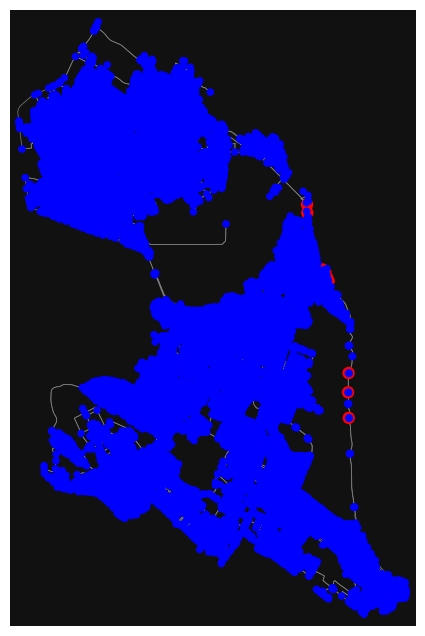

In [28]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import heapq

class MinHeap:
    def __init__(self, data):
        self.heap = []
        self.index = {}
        for idx, (node, dist) in enumerate(data):
            self.heap.append([dist, node])
            self.index[node] = idx
        heapq.heapify(self.heap)

    def remove(self):
        return heapq.heappop(self.heap)[1]  # Retorna apenas o nó

    def update(self, node, distance):
        idx = self.index[node]
        self.heap[idx][0] = distance
        heapq.heapify(self.heap)

    def isEmpty(self):
        return len(self.heap) == 0

def dijkstrasAlgorithm(start, edges):
    numberOfVertices = len(edges)
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0
    minDistancesHeap = MinHeap([(idx, float("inf")) for idx in range(numberOfVertices)])
    minDistancesHeap.update(start, 0)

    while not minDistancesHeap.isEmpty():
        vertex = minDistancesHeap.remove()  # Agora remove corretamente o nó
        currentMinDistance = minDistances[vertex]
        if currentMinDistance == float("inf"):
            break
        for edge in edges[vertex]:
            destination, distanceToDestination = edge
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]
            if newPathDistance < currentDestinationDistance:
                minDistances[destination] = newPathDistance
                minDistancesHeap.update(destination, newPathDistance)

    return list(map(lambda x: -1 if x == float("inf") else x, minDistances))

def calculate_shortest_paths_dijkstra(graph, start_node, end_nodes):
    # Cria um mapeamento entre os nós e índices
    node_to_index = {node: idx for idx, node in enumerate(graph.nodes)}
    index_to_node = {idx: node for idx, node in enumerate(graph.nodes)}
    
    # Converte os nós para índices para usar no algoritmo de Dijkstra
    start_index = node_to_index[start_node]
    end_indices = [node_to_index[end] for end in end_nodes]
    
    # Converte o grafo para o formato de lista de adjacência
    adjacency_list = {
        idx: [(node_to_index[neighbor], data["length"]) for neighbor, data in graph[node].items()]
        for idx, node in enumerate(graph.nodes)
    }
    
    # Aplica o algoritmo de Dijkstra
    distances = dijkstrasAlgorithm(start_index, adjacency_list)
    
    # Converte as distâncias de volta para os nós finais
    return {index_to_node[idx]: distances[idx] for idx in end_indices}

# Baixar a rede de Natal, Brasil
place_name = "Natal, Brazil"
graph = ox.graph_from_place(place_name, network_type="drive")

# Verificar se a rede já foi simplificada
if not graph.graph.get("simplified", False):
    graph = ox.simplify_graph(graph)

# Converter para formato NetworkX para análise
graph_nx = nx.DiGraph(graph)

# Selecionar 10 pares de nós (origem, destino) consecutivos
nodes = list(graph_nx.nodes)
if len(nodes) >= 10:
    pairs_of_interest = [(nodes[i], nodes[i + 1]) for i in range(10)]
    print("Pares de interesse (origem, destino):", pairs_of_interest)

    # Extrair os nós únicos dos pares
    highlighted_nodes = {node for pair in pairs_of_interest for node in pair}

    # Calcular as distâncias mínimas usando Dijkstra para cada par
    shortest_paths = {
        (start, end): calculate_shortest_paths_dijkstra(graph_nx, start, [end])
        for start, end in pairs_of_interest
    }
    print("Caminhos mais curtos entre pares:", shortest_paths)

    # Plotar o grafo com destaque nos pares selecionados
    fig, ax = ox.plot_graph(
        graph,
        node_color=["red" if node in highlighted_nodes else "blue" for node in graph.nodes()],
        node_size=[80 if node in highlighted_nodes else 30 for node in graph.nodes()],
        edge_color="gray",
        edge_linewidth=0.5,
        show=True,
        close=False,
    )

    # Adicionar título
    ax.set_title("Grafo com pares de nós destacados", fontsize=15)
else:
    print("A rede possui menos de 10 nós.")
